In [3]:
import sympy as sy

In [2]:
# set up sympy variables
import sympy as sy
t, Me, p, h, w, j, f, Ae, Ap, u, a, b, d, n, V, vmax, Km = sy.symbols("t, Me, p, h, w, j, f, Ae, Ap, u, a, b, d, n, V, vmax, Km")
P, Pm, Pa, Pu, M, E, Em, Ea, Eu = sy.symbols("P, Pm, Pa, Pu, M, E, Em, Ea, Eu")

In [6]:
# substitution into M to get equation for bisection method
# steady states computed previously
steady_states = {P : p*w*(M*a**2*d*h + M*a*d*h*j + a**2*b*f*w + a**2*d*f*w + 2*a*b*f*j*w + 2*a*d*f*j*w + b*f*j**2*w + d*f*j**2*w)/(M*a**2*d*h**2*(M + Me*w)),
                 Pm : p*(M*a*d*h + a*b*f*w + a*d*f*w + b*f*j*w + d*f*j*w)/(M*a**2*d*h),
                 Pa : p*(M*a*d*h + a*b*f*w + a*d*f*w + b*f*j*w + d*f*j*w)/(M*a*d*h*u),
                 Pu : p*(M*a*d*h + a*b*f*w + a*d*f*w + b*f*j*w + d*f*j*w)/(M*a*d*h*n),
                 E : Ap*p*w*(a*b + a*d + b*j + d*j)/(Ae*M*a*d*h),
                 Em : Ap*p*(b + d)/(Ae*a*d),
                 Ea : Ap*p*(b + d)/(Ae*d*u),
                 Eu : Ap*p/(Ae*d)}

# substitutions
dM = -(h/w)*M*((Ap / V)*P + (Ae / V)*E) + (j + u)*((Ae / V)*Em + (Ap / V)*Pm) - vmax*M/(V*(Km + M))  # M 

new_dM = dM.subs(steady_states)
new_dM = sy.simplify(new_dM)
print(new_dM)
new_dM
#sy.solve(new_dM, M)

(-Ap*M*p*(Km + M)*(M*a**2*d*h + M*a*d*h*j + a**2*b*f*w + a**2*d*f*w + 2*a*b*f*j*w + 2*a*d*f*j*w + a*h*(M + Me*w)*(a*b + a*d + b*j + d*j) + b*f*j**2*w + d*f*j**2*w) + Ap*p*(Km + M)*(M + Me*w)*(j + u)*(M*a*d*h + M*a*h*(b + d) + a*b*f*w + a*d*f*w + b*f*j*w + d*f*j*w) - M**2*a**2*d*h*vmax*(M + Me*w))/(M*V*a**2*d*h*(Km + M)*(M + Me*w))


(-Ap*M*p*(Km + M)*(M*a**2*d*h + M*a*d*h*j + a**2*b*f*w + a**2*d*f*w + 2*a*b*f*j*w + 2*a*d*f*j*w + a*h*(M + Me*w)*(a*b + a*d + b*j + d*j) + b*f*j**2*w + d*f*j**2*w) + Ap*p*(Km + M)*(M + Me*w)*(j + u)*(M*a*d*h + M*a*h*(b + d) + a*b*f*w + a*d*f*w + b*f*j*w + d*f*j*w) - M**2*a**2*d*h*vmax*(M + Me*w))/(M*V*a**2*d*h*(Km + M)*(M + Me*w))

In [5]:
p = 8.3e-5 #'' # units mup1 per millisecond (mup1 production rate)
kd = 8993
h = 100 / kd #'' # per micromolar per millisecond (methionine binding rate)
w = 32 # unitless (scale factor for pH difference)
j = 100 #'' # per millisecond (methionine unbinding rate)
f = .25 #'' # per millisecond (recycling rate)
Ae = 47 # micrometers^3 (endosomal membrane surface area)
Ap = 314 # micrometers^3 (plasma membrane surface area)
u = 1 # per millisecond (ubiquitination rate)
a = 10 #'' # per micromolar per millisecond (art 1 binding rate)
b = 1 # per millisecond (deubiquitination rate)
d = .002 #'' # per millisecond (degradation rate)
n = 0.1 #'' # per millisecond (endocytosis rate)
V = 523 # micrometers^3 (volume of cytoplasm)
vmax = 174333.33 #'' # micromolars*micrometers^3 per millisecond (maximal rate of methionine metabolism)
Km = 350 #'' # micromolars (methionin michaelis-menten constant)
# vmax = 8.8e3
# Km = 2.5
Me = .1

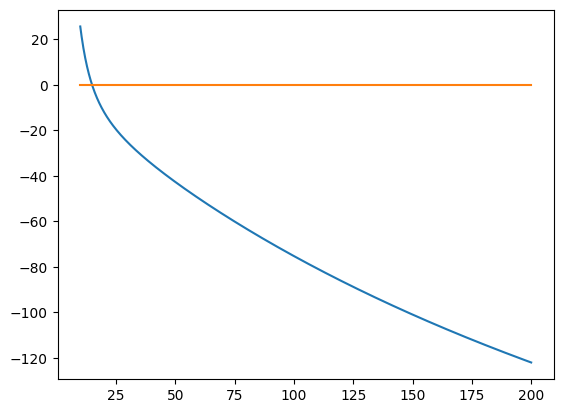

In [7]:
import numpy as np
from matplotlib import pyplot as plt

dM_func = sy.lambdify(M, (-Ap*M*p*(Km + M)*(M*a**2*d*h + M*a*d*h*j + a**2*b*f*w + a**2*d*f*w + 2*a*b*f*j*w + 2*a*d*f*j*w + a*h*(M + Me*w)*(a*b + a*d + b*j + d*j) + b*f*j**2*w + d*f*j**2*w) + Ap*p*(Km + M)*(M + Me*w)*(j + u)*(M*a*d*h + M*a*h*(b + d) + a*b*f*w + a*d*f*w + b*f*j*w + d*f*j*w) - M**2*a**2*d*h*vmax*(M + Me*w))/(M*V*a**2*d*h*(Km + M)*(M + Me*w)))

# plot dM against M
x_vals = np.linspace(10, 200, 1000)
plt.plot(x_vals, dM_func(x_vals))
plt.plot(x_vals, np.zeros_like(x_vals))
plt.show()

In [61]:
from mup1_model import *

def plot_steady_states(Me, Kd):    
    # establish initial conditions
    initial = [.10, .10, .40, .1, .10, .10, .10, .10, 500]
    times = np.linspace(0, 80, 200)
    labels = ['P', 'Pm', 'Pa', 'Pu', 'E', 'Em', 'Ea', 'Eu', 'M']

    # solve using solve_ivp
    system = lambda t, y: model(y, t, Me, p, 100/Kd, w, j, f, Ae, Ap, u, a, b, d, n, V, vmax, Km)
    solution = solve_ivp(system, [times[0], times[-1]], initial, t_eval=times)

    for i in range(4):
        plt.plot(times, solution.y[i], label=f'{labels[i]}(t) (solve_ivp)', linestyle='--')
    #plt.plot(time_points, solution_solve_ivp.y[1], label='y2(t) (solve_ivp)', linestyle='--')
    plt.xlabel('Time')
    plt.ylabel('y(t)')
    plt.title(f'(Kd = {Kd})')
    # plt.show()

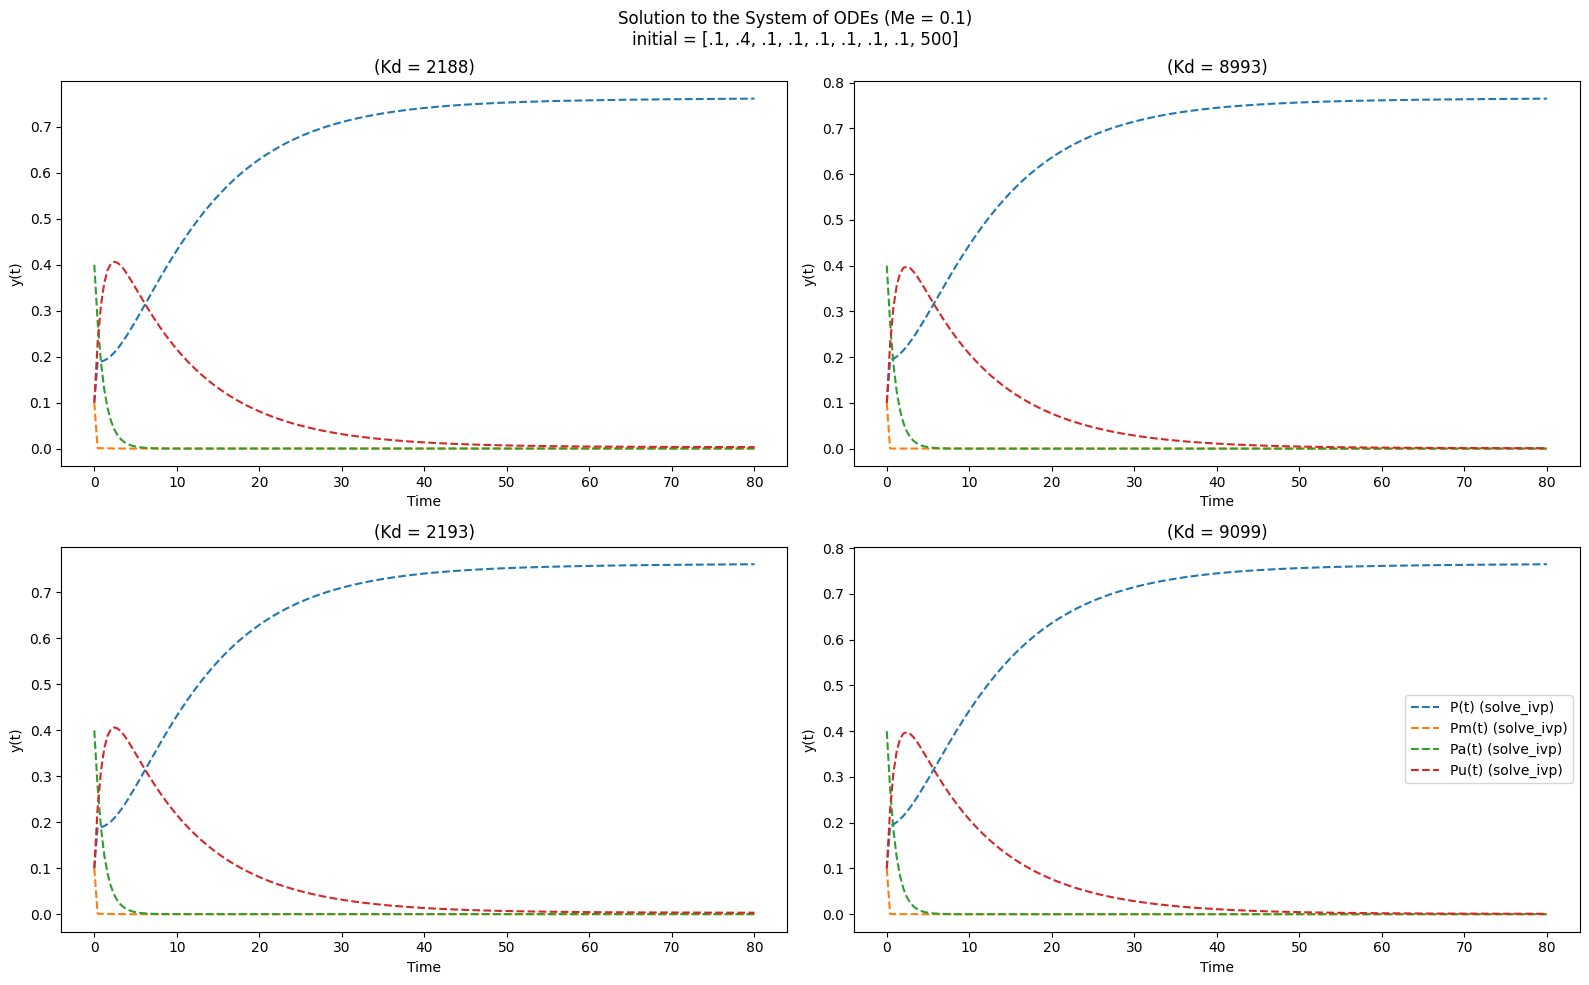

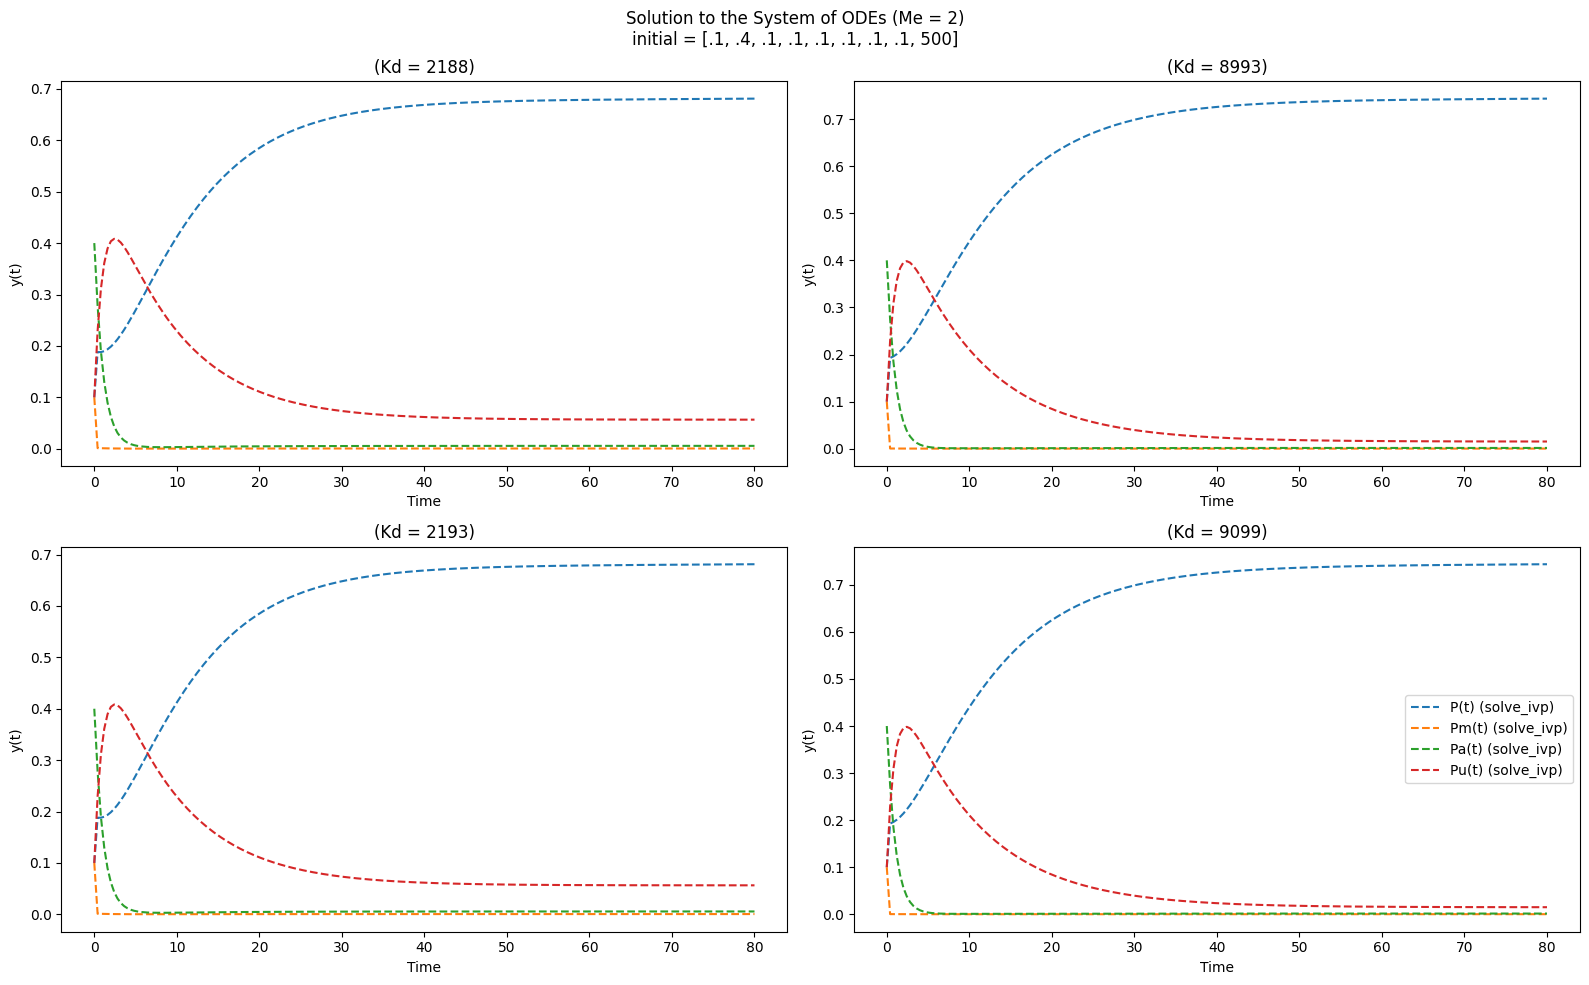

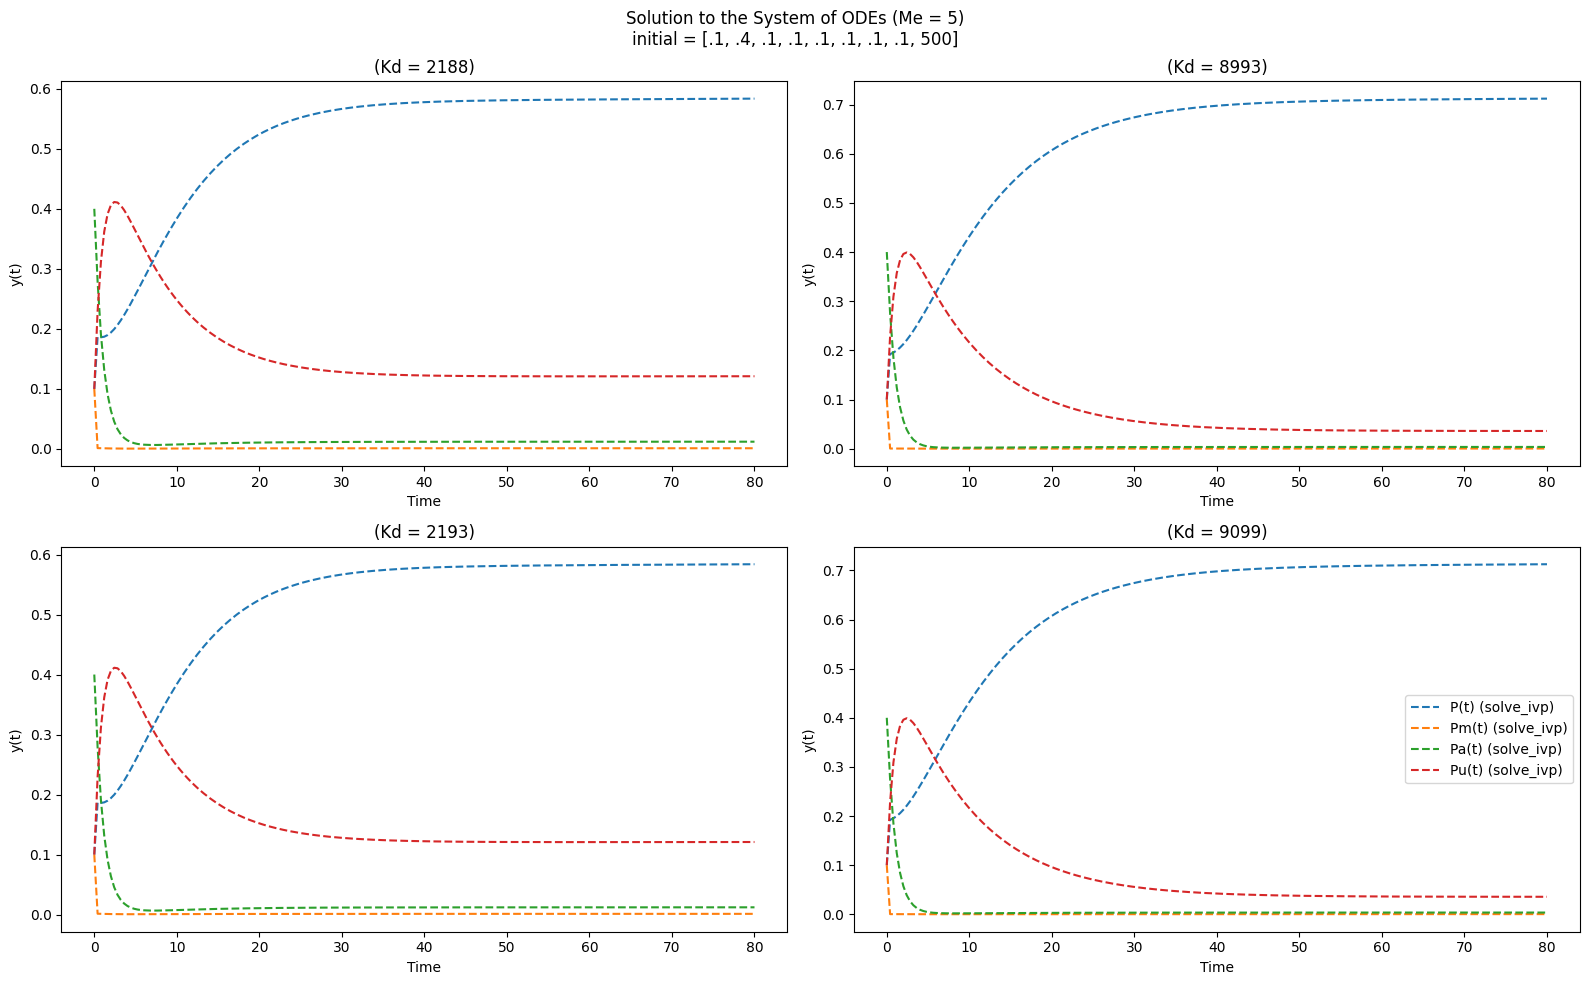

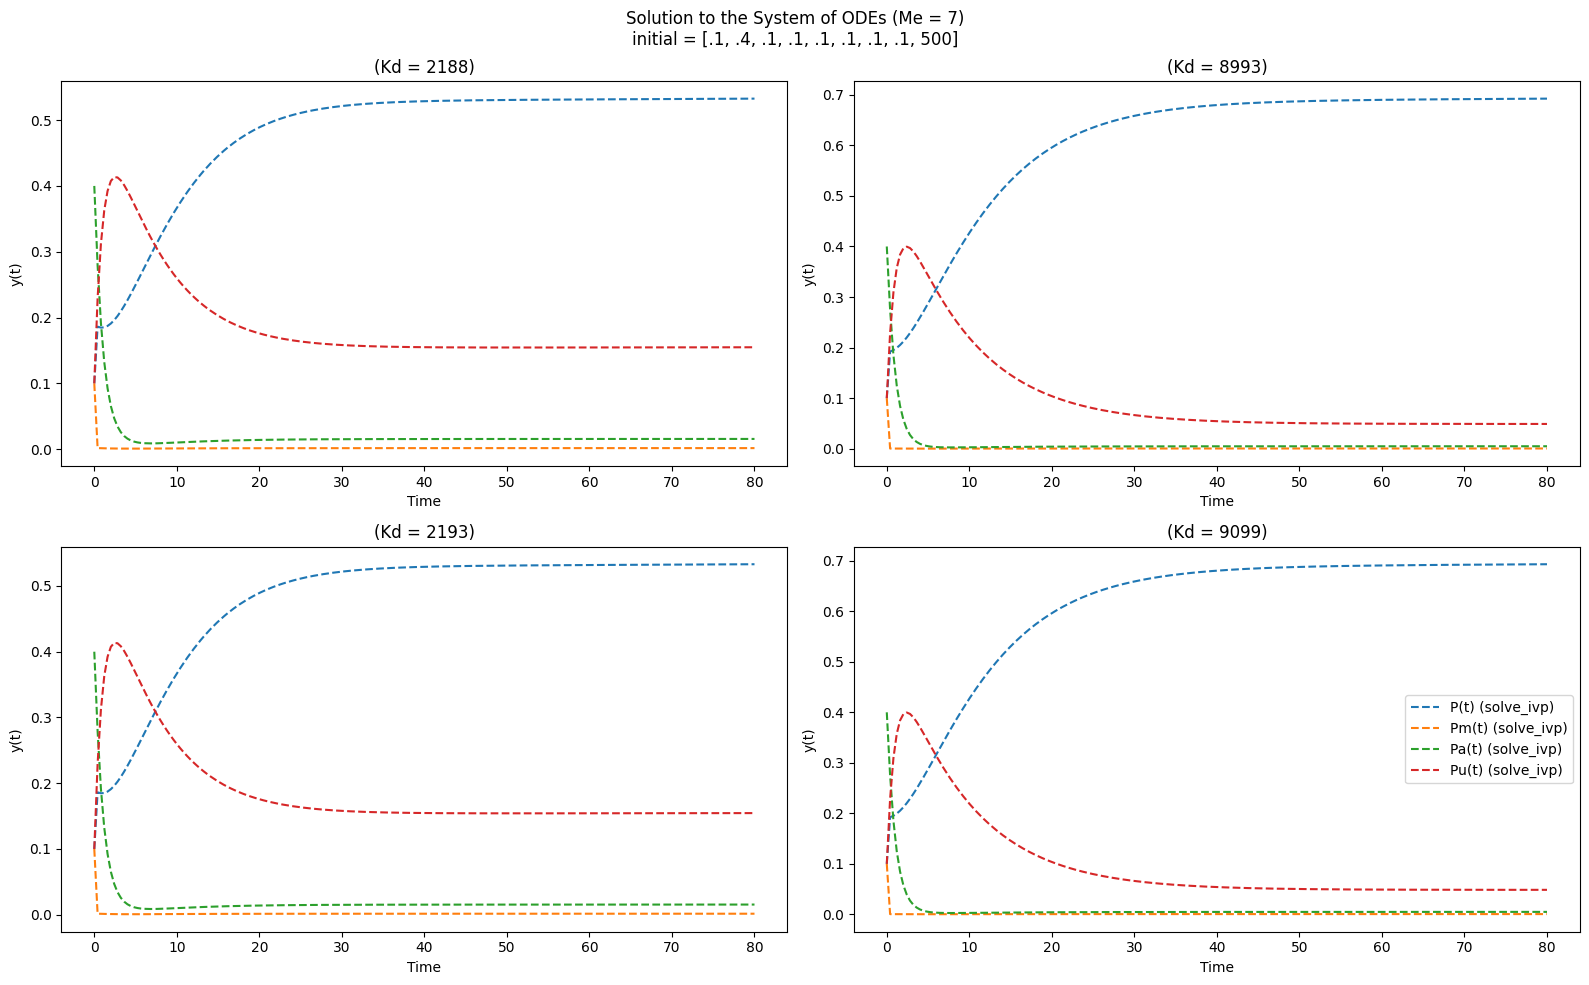

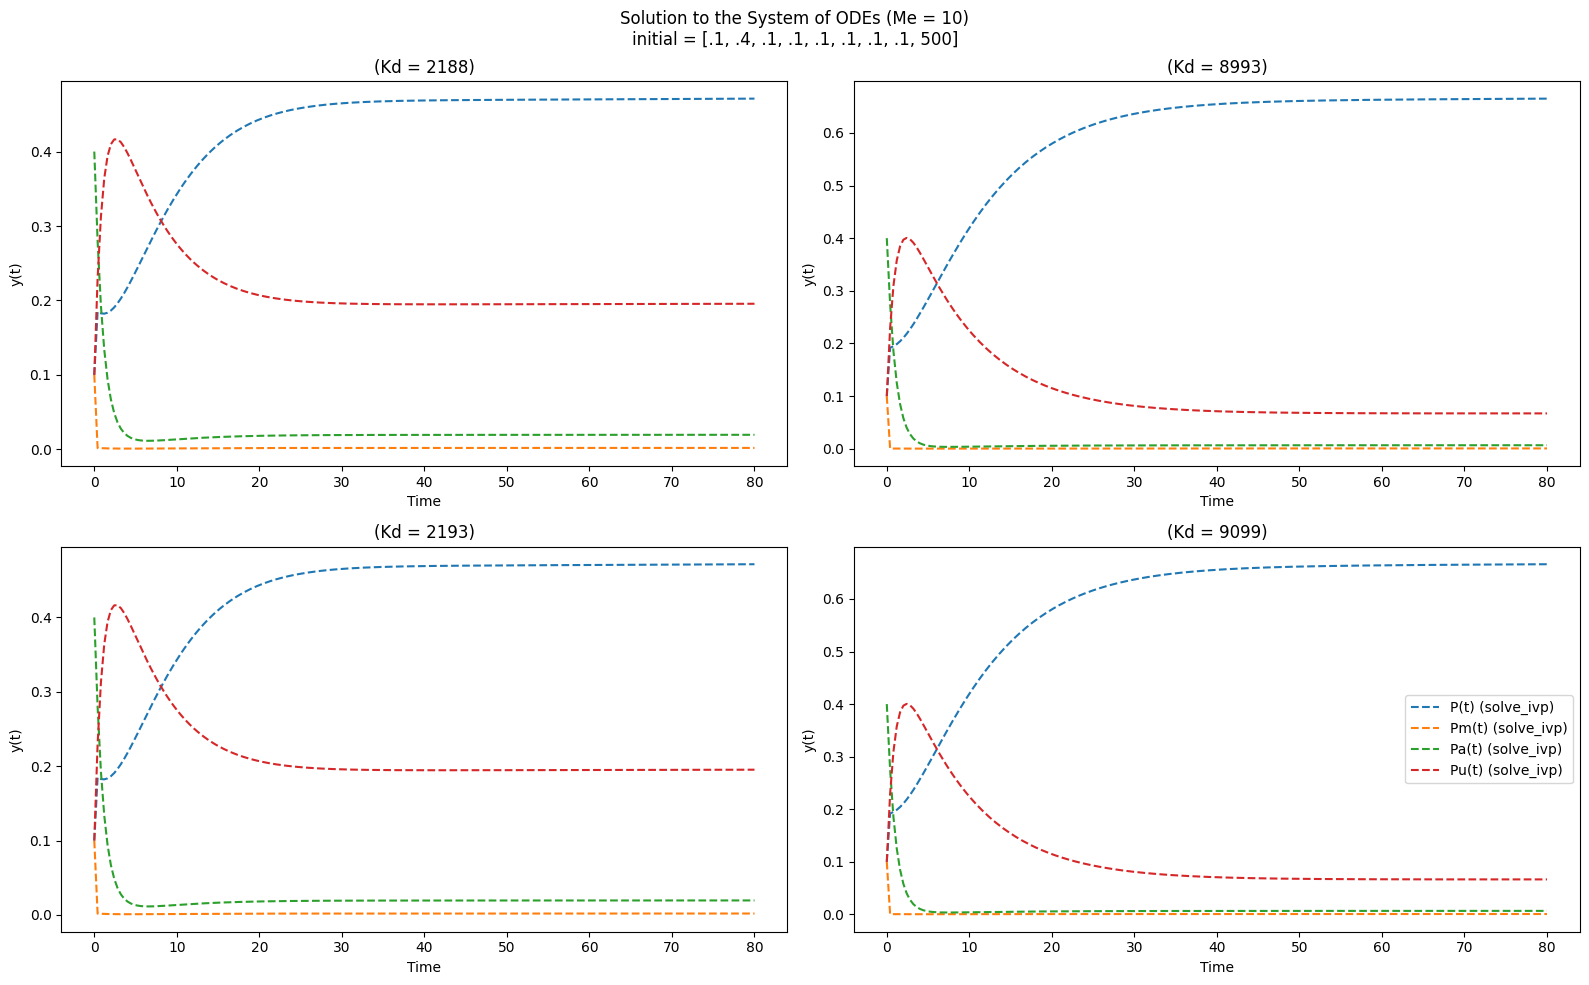

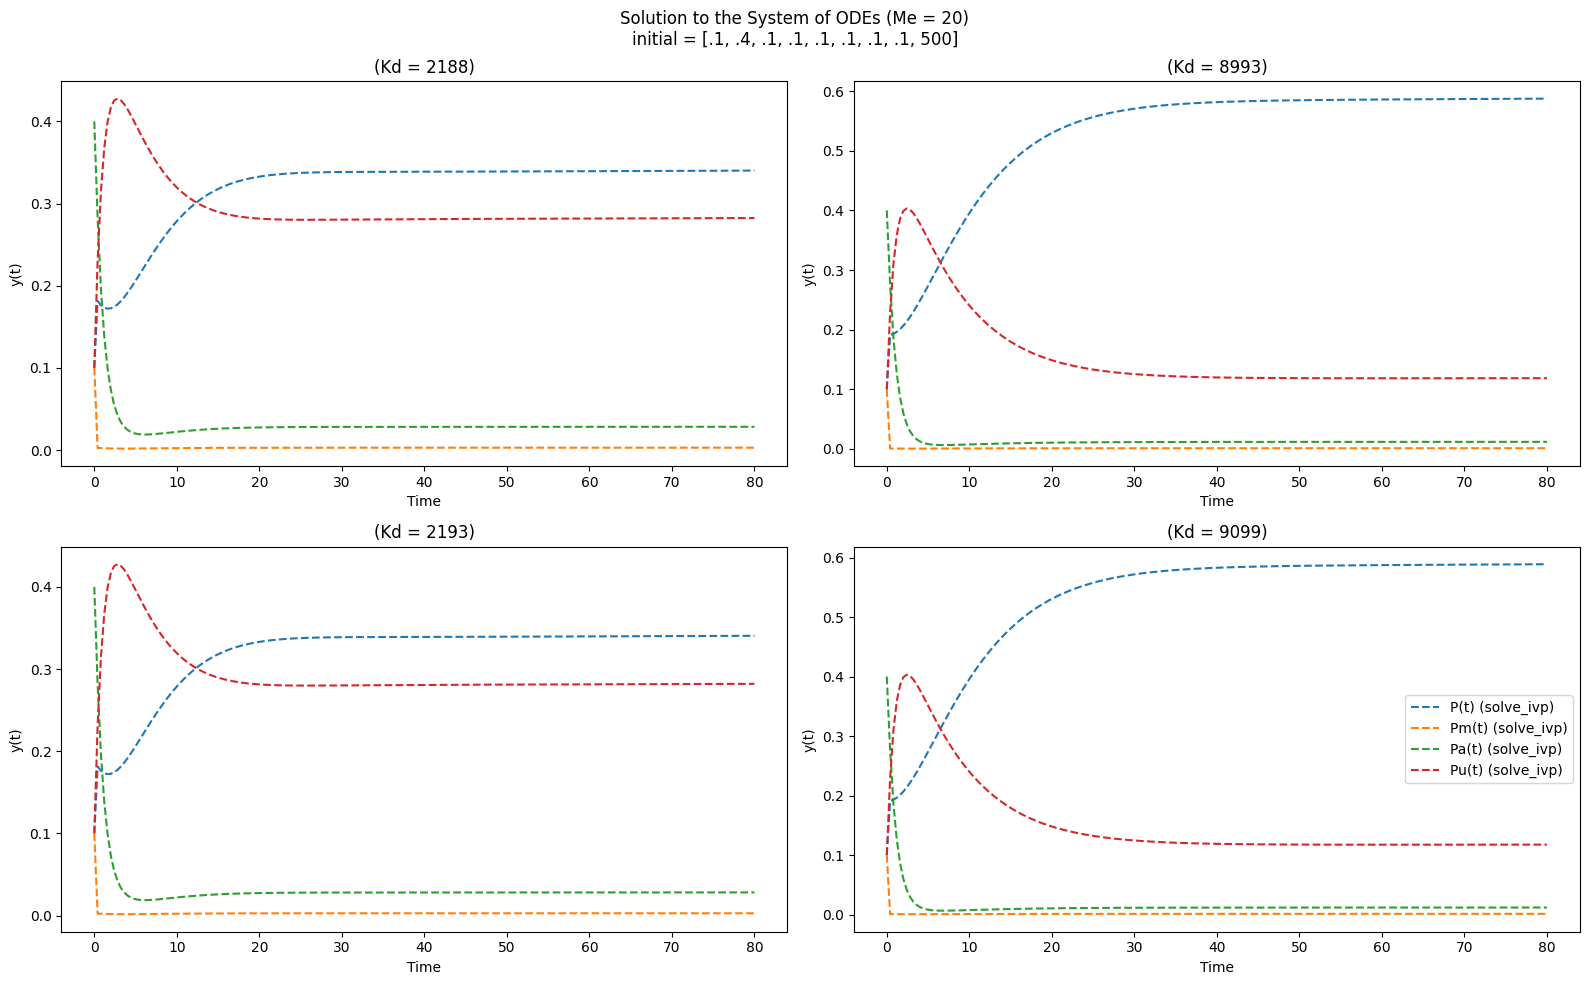

In [62]:
# plot the differential equations for varying extracellular methionine

Me_vals = [0.1, 2, 5, 7, 10, 20]

for _, m in enumerate(Me_vals):
    plt.figure(figsize=(16, 10))
    for i, val in enumerate([2188, 8993, 2193, 9099]):
        plt.subplot(2, 2, i + 1)
        plot_steady_states(m, val)
    plt.suptitle(f"Solution to the System of ODEs (Me = {m})\ninitial = [.1, .4, .1, .1, .1, .1, .1, .1, 500]")
    plt.legend()
    plt.tight_layout()
    # plt.savefig(f"Images/varying_parameters/varying_Kd/initial_50_25_Me_{m}_varying_Kd.png")
    plt.show()


In [ ]:
# symbolic solution for M
# numerator = sy.simplify(new_dM * (M*V*a**2*d*h*(Km + M)*(M + Me*w)))
# solutions = sy.solve(numerator, M)
# for sol in solutions:
#     print(sol)

M = -(-3*(-Ap*Km*Me*a**2*b*h*p*w - Ap*Km*Me*a**2*d*h*p*w + Ap*Km*Me*a*b*h*p*u*w + Ap*Km*Me*a*d*h*j*p*w + 2*Ap*Km*Me*a*d*h*p*u*w - Ap*Km*a**2*b*f*p*w - Ap*Km*a**2*d*f*p*w - Ap*Km*a*b*f*j*p*w + Ap*Km*a*b*f*p*u*w - Ap*Km*a*d*f*j*p*w + Ap*Km*a*d*f*p*u*w + Ap*Km*b*f*j*p*u*w + Ap*Km*d*f*j*p*u*w + Ap*Me*a*b*f*j*p*w**2 + Ap*Me*a*b*f*p*u*w**2 + Ap*Me*a*d*f*j*p*w**2 + Ap*Me*a*d*f*p*u*w**2 + Ap*Me*b*f*j**2*p*w**2 + Ap*Me*b*f*j*p*u*w**2 + Ap*Me*d*f*j**2*p*w**2 + Ap*Me*d*f*j*p*u*w**2)/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax) + (-Ap*Km*a**2*b*h*p - 2*Ap*Km*a**2*d*h*p + Ap*Km*a*b*h*p*u + 2*Ap*Km*a*d*h*p*u - Ap*Me*a**2*b*h*p*w - Ap*Me*a**2*d*h*p*w + Ap*Me*a*b*h*p*u*w + Ap*Me*a*d*h*j*p*w + 2*Ap*Me*a*d*h*p*u*w - Ap*a**2*b*f*p*w - Ap*a**2*d*f*p*w - Ap*a*b*f*j*p*w + Ap*a*b*f*p*u*w - Ap*a*d*f*j*p*w + Ap*a*d*f*p*u*w + Ap*b*f*j*p*u*w + Ap*d*f*j*p*u*w - Me*a**2*d*h*vmax*w)**2/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)**2)/(3*(sy.sqrt(-4*(-3*(-Ap*Km*Me*a**2*b*h*p*w - Ap*Km*Me*a**2*d*h*p*w + Ap*Km*Me*a*b*h*p*u*w + Ap*Km*Me*a*d*h*j*p*w + 2*Ap*Km*Me*a*d*h*p*u*w - Ap*Km*a**2*b*f*p*w - Ap*Km*a**2*d*f*p*w - Ap*Km*a*b*f*j*p*w + Ap*Km*a*b*f*p*u*w - Ap*Km*a*d*f*j*p*w + Ap*Km*a*d*f*p*u*w + Ap*Km*b*f*j*p*u*w + Ap*Km*d*f*j*p*u*w + Ap*Me*a*b*f*j*p*w**2 + Ap*Me*a*b*f*p*u*w**2 + Ap*Me*a*d*f*j*p*w**2 + Ap*Me*a*d*f*p*u*w**2 + Ap*Me*b*f*j**2*p*w**2 + Ap*Me*b*f*j*p*u*w**2 + Ap*Me*d*f*j**2*p*w**2 + Ap*Me*d*f*j*p*u*w**2)/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax) + (-Ap*Km*a**2*b*h*p - 2*Ap*Km*a**2*d*h*p + Ap*Km*a*b*h*p*u + 2*Ap*Km*a*d*h*p*u - Ap*Me*a**2*b*h*p*w - Ap*Me*a**2*d*h*p*w + Ap*Me*a*b*h*p*u*w + Ap*Me*a*d*h*j*p*w + 2*Ap*Me*a*d*h*p*u*w - Ap*a**2*b*f*p*w - Ap*a**2*d*f*p*w - Ap*a*b*f*j*p*w + Ap*a*b*f*p*u*w - Ap*a*d*f*j*p*w + Ap*a*d*f*p*u*w + Ap*b*f*j*p*u*w + Ap*d*f*j*p*u*w - Me*a**2*d*h*vmax*w)**2/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)**2)**3 + (27*(Ap*Km*Me*a*b*f*j*p*w**2 + Ap*Km*Me*a*b*f*p*u*w**2 + Ap*Km*Me*a*d*f*j*p*w**2 + Ap*Km*Me*a*d*f*p*u*w**2 + Ap*Km*Me*b*f*j**2*p*w**2 + Ap*Km*Me*b*f*j*p*u*w**2 + Ap*Km*Me*d*f*j**2*p*w**2 + Ap*Km*Me*d*f*j*p*u*w**2)/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax) - 9*(-Ap*Km*a**2*b*h*p - 2*Ap*Km*a**2*d*h*p + Ap*Km*a*b*h*p*u + 2*Ap*Km*a*d*h*p*u - Ap*Me*a**2*b*h*p*w - Ap*Me*a**2*d*h*p*w + Ap*Me*a*b*h*p*u*w + Ap*Me*a*d*h*j*p*w + 2*Ap*Me*a*d*h*p*u*w - Ap*a**2*b*f*p*w - Ap*a**2*d*f*p*w - Ap*a*b*f*j*p*w + Ap*a*b*f*p*u*w - Ap*a*d*f*j*p*w + Ap*a*d*f*p*u*w + Ap*b*f*j*p*u*w + Ap*d*f*j*p*u*w - Me*a**2*d*h*vmax*w)*(-Ap*Km*Me*a**2*b*h*p*w - Ap*Km*Me*a**2*d*h*p*w + Ap*Km*Me*a*b*h*p*u*w + Ap*Km*Me*a*d*h*j*p*w + 2*Ap*Km*Me*a*d*h*p*u*w - Ap*Km*a**2*b*f*p*w - Ap*Km*a**2*d*f*p*w - Ap*Km*a*b*f*j*p*w + Ap*Km*a*b*f*p*u*w - Ap*Km*a*d*f*j*p*w + Ap*Km*a*d*f*p*u*w + Ap*Km*b*f*j*p*u*w + Ap*Km*d*f*j*p*u*w + Ap*Me*a*b*f*j*p*w**2 + Ap*Me*a*b*f*p*u*w**2 + Ap*Me*a*d*f*j*p*w**2 + Ap*Me*a*d*f*p*u*w**2 + Ap*Me*b*f*j**2*p*w**2 + Ap*Me*b*f*j*p*u*w**2 + Ap*Me*d*f*j**2*p*w**2 + Ap*Me*d*f*j*p*u*w**2)/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)**2 + 2*(-Ap*Km*a**2*b*h*p - 2*Ap*Km*a**2*d*h*p + Ap*Km*a*b*h*p*u + 2*Ap*Km*a*d*h*p*u - Ap*Me*a**2*b*h*p*w - Ap*Me*a**2*d*h*p*w + Ap*Me*a*b*h*p*u*w + Ap*Me*a*d*h*j*p*w + 2*Ap*Me*a*d*h*p*u*w - Ap*a**2*b*f*p*w - Ap*a**2*d*f*p*w - Ap*a*b*f*j*p*w + Ap*a*b*f*p*u*w - Ap*a*d*f*j*p*w + Ap*a*d*f*p*u*w + Ap*b*f*j*p*u*w + Ap*d*f*j*p*u*w - Me*a**2*d*h*vmax*w)**3/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)**3)**2)/2 + 27*(Ap*Km*Me*a*b*f*j*p*w**2 + Ap*Km*Me*a*b*f*p*u*w**2 + Ap*Km*Me*a*d*f*j*p*w**2 + Ap*Km*Me*a*d*f*p*u*w**2 + Ap*Km*Me*b*f*j**2*p*w**2 + Ap*Km*Me*b*f*j*p*u*w**2 + Ap*Km*Me*d*f*j**2*p*w**2 + Ap*Km*Me*d*f*j*p*u*w**2)/(2*(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)) - 9*(-Ap*Km*a**2*b*h*p - 2*Ap*Km*a**2*d*h*p + Ap*Km*a*b*h*p*u + 2*Ap*Km*a*d*h*p*u - Ap*Me*a**2*b*h*p*w - Ap*Me*a**2*d*h*p*w + Ap*Me*a*b*h*p*u*w + Ap*Me*a*d*h*j*p*w + 2*Ap*Me*a*d*h*p*u*w - Ap*a**2*b*f*p*w - Ap*a**2*d*f*p*w - Ap*a*b*f*j*p*w + Ap*a*b*f*p*u*w - Ap*a*d*f*j*p*w + Ap*a*d*f*p*u*w + Ap*b*f*j*p*u*w + Ap*d*f*j*p*u*w - Me*a**2*d*h*vmax*w)*(-Ap*Km*Me*a**2*b*h*p*w - Ap*Km*Me*a**2*d*h*p*w + Ap*Km*Me*a*b*h*p*u*w + Ap*Km*Me*a*d*h*j*p*w + 2*Ap*Km*Me*a*d*h*p*u*w - Ap*Km*a**2*b*f*p*w - Ap*Km*a**2*d*f*p*w - Ap*Km*a*b*f*j*p*w + Ap*Km*a*b*f*p*u*w - Ap*Km*a*d*f*j*p*w + Ap*Km*a*d*f*p*u*w + Ap*Km*b*f*j*p*u*w + Ap*Km*d*f*j*p*u*w + Ap*Me*a*b*f*j*p*w**2 + Ap*Me*a*b*f*p*u*w**2 + Ap*Me*a*d*f*j*p*w**2 + Ap*Me*a*d*f*p*u*w**2 + Ap*Me*b*f*j**2*p*w**2 + Ap*Me*b*f*j*p*u*w**2 + Ap*Me*d*f*j**2*p*w**2 + Ap*Me*d*f*j*p*u*w**2)/(2*(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)**2) + (-Ap*Km*a**2*b*h*p - 2*Ap*Km*a**2*d*h*p + Ap*Km*a*b*h*p*u + 2*Ap*Km*a*d*h*p*u - Ap*Me*a**2*b*h*p*w - Ap*Me*a**2*d*h*p*w + Ap*Me*a*b*h*p*u*w + Ap*Me*a*d*h*j*p*w + 2*Ap*Me*a*d*h*p*u*w - Ap*a**2*b*f*p*w - Ap*a**2*d*f*p*w - Ap*a*b*f*j*p*w + Ap*a*b*f*p*u*w - Ap*a*d*f*j*p*w + Ap*a*d*f*p*u*w + Ap*b*f*j*p*u*w + Ap*d*f*j*p*u*w - Me*a**2*d*h*vmax*w)**3/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)**3)**(1/3)) - (sy.sqrt(-4*(-3*(-Ap*Km*Me*a**2*b*h*p*w - Ap*Km*Me*a**2*d*h*p*w + Ap*Km*Me*a*b*h*p*u*w + Ap*Km*Me*a*d*h*j*p*w + 2*Ap*Km*Me*a*d*h*p*u*w - Ap*Km*a**2*b*f*p*w - Ap*Km*a**2*d*f*p*w - Ap*Km*a*b*f*j*p*w + Ap*Km*a*b*f*p*u*w - Ap*Km*a*d*f*j*p*w + Ap*Km*a*d*f*p*u*w + Ap*Km*b*f*j*p*u*w + Ap*Km*d*f*j*p*u*w + Ap*Me*a*b*f*j*p*w**2 + Ap*Me*a*b*f*p*u*w**2 + Ap*Me*a*d*f*j*p*w**2 + Ap*Me*a*d*f*p*u*w**2 + Ap*Me*b*f*j**2*p*w**2 + Ap*Me*b*f*j*p*u*w**2 + Ap*Me*d*f*j**2*p*w**2 + Ap*Me*d*f*j*p*u*w**2)/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax) + (-Ap*Km*a**2*b*h*p - 2*Ap*Km*a**2*d*h*p + Ap*Km*a*b*h*p*u + 2*Ap*Km*a*d*h*p*u - Ap*Me*a**2*b*h*p*w - Ap*Me*a**2*d*h*p*w + Ap*Me*a*b*h*p*u*w + Ap*Me*a*d*h*j*p*w + 2*Ap*Me*a*d*h*p*u*w - Ap*a**2*b*f*p*w - Ap*a**2*d*f*p*w - Ap*a*b*f*j*p*w + Ap*a*b*f*p*u*w - Ap*a*d*f*j*p*w + Ap*a*d*f*p*u*w + Ap*b*f*j*p*u*w + Ap*d*f*j*p*u*w - Me*a**2*d*h*vmax*w)**2/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)**2)**3 + (27*(Ap*Km*Me*a*b*f*j*p*w**2 + Ap*Km*Me*a*b*f*p*u*w**2 + Ap*Km*Me*a*d*f*j*p*w**2 + Ap*Km*Me*a*d*f*p*u*w**2 + Ap*Km*Me*b*f*j**2*p*w**2 + Ap*Km*Me*b*f*j*p*u*w**2 + Ap*Km*Me*d*f*j**2*p*w**2 + Ap*Km*Me*d*f*j*p*u*w**2)/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax) - 9*(-Ap*Km*a**2*b*h*p - 2*Ap*Km*a**2*d*h*p + Ap*Km*a*b*h*p*u + 2*Ap*Km*a*d*h*p*u - Ap*Me*a**2*b*h*p*w - Ap*Me*a**2*d*h*p*w + Ap*Me*a*b*h*p*u*w + Ap*Me*a*d*h*j*p*w + 2*Ap*Me*a*d*h*p*u*w - Ap*a**2*b*f*p*w - Ap*a**2*d*f*p*w - Ap*a*b*f*j*p*w + Ap*a*b*f*p*u*w - Ap*a*d*f*j*p*w + Ap*a*d*f*p*u*w + Ap*b*f*j*p*u*w + Ap*d*f*j*p*u*w - Me*a**2*d*h*vmax*w)*(-Ap*Km*Me*a**2*b*h*p*w - Ap*Km*Me*a**2*d*h*p*w + Ap*Km*Me*a*b*h*p*u*w + Ap*Km*Me*a*d*h*j*p*w + 2*Ap*Km*Me*a*d*h*p*u*w - Ap*Km*a**2*b*f*p*w - Ap*Km*a**2*d*f*p*w - Ap*Km*a*b*f*j*p*w + Ap*Km*a*b*f*p*u*w - Ap*Km*a*d*f*j*p*w + Ap*Km*a*d*f*p*u*w + Ap*Km*b*f*j*p*u*w + Ap*Km*d*f*j*p*u*w + Ap*Me*a*b*f*j*p*w**2 + Ap*Me*a*b*f*p*u*w**2 + Ap*Me*a*d*f*j*p*w**2 + Ap*Me*a*d*f*p*u*w**2 + Ap*Me*b*f*j**2*p*w**2 + Ap*Me*b*f*j*p*u*w**2 + Ap*Me*d*f*j**2*p*w**2 + Ap*Me*d*f*j*p*u*w**2)/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)**2 + 2*(-Ap*Km*a**2*b*h*p - 2*Ap*Km*a**2*d*h*p + Ap*Km*a*b*h*p*u + 2*Ap*Km*a*d*h*p*u - Ap*Me*a**2*b*h*p*w - Ap*Me*a**2*d*h*p*w + Ap*Me*a*b*h*p*u*w + Ap*Me*a*d*h*j*p*w + 2*Ap*Me*a*d*h*p*u*w - Ap*a**2*b*f*p*w - Ap*a**2*d*f*p*w - Ap*a*b*f*j*p*w + Ap*a*b*f*p*u*w - Ap*a*d*f*j*p*w + Ap*a*d*f*p*u*w + Ap*b*f*j*p*u*w + Ap*d*f*j*p*u*w - Me*a**2*d*h*vmax*w)**3/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)**3)**2)/2 + 27*(Ap*Km*Me*a*b*f*j*p*w**2 + Ap*Km*Me*a*b*f*p*u*w**2 + Ap*Km*Me*a*d*f*j*p*w**2 + Ap*Km*Me*a*d*f*p*u*w**2 + Ap*Km*Me*b*f*j**2*p*w**2 + Ap*Km*Me*b*f*j*p*u*w**2 + Ap*Km*Me*d*f*j**2*p*w**2 + Ap*Km*Me*d*f*j*p*u*w**2)/(2*(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)) - 9*(-Ap*Km*a**2*b*h*p - 2*Ap*Km*a**2*d*h*p + Ap*Km*a*b*h*p*u + 2*Ap*Km*a*d*h*p*u - Ap*Me*a**2*b*h*p*w - Ap*Me*a**2*d*h*p*w + Ap*Me*a*b*h*p*u*w + Ap*Me*a*d*h*j*p*w + 2*Ap*Me*a*d*h*p*u*w - Ap*a**2*b*f*p*w - Ap*a**2*d*f*p*w - Ap*a*b*f*j*p*w + Ap*a*b*f*p*u*w - Ap*a*d*f*j*p*w + Ap*a*d*f*p*u*w + Ap*b*f*j*p*u*w + Ap*d*f*j*p*u*w - Me*a**2*d*h*vmax*w)*(-Ap*Km*Me*a**2*b*h*p*w - Ap*Km*Me*a**2*d*h*p*w + Ap*Km*Me*a*b*h*p*u*w + Ap*Km*Me*a*d*h*j*p*w + 2*Ap*Km*Me*a*d*h*p*u*w - Ap*Km*a**2*b*f*p*w - Ap*Km*a**2*d*f*p*w - Ap*Km*a*b*f*j*p*w + Ap*Km*a*b*f*p*u*w - Ap*Km*a*d*f*j*p*w + Ap*Km*a*d*f*p*u*w + Ap*Km*b*f*j*p*u*w + Ap*Km*d*f*j*p*u*w + Ap*Me*a*b*f*j*p*w**2 + Ap*Me*a*b*f*p*u*w**2 + Ap*Me*a*d*f*j*p*w**2 + Ap*Me*a*d*f*p*u*w**2 + Ap*Me*b*f*j**2*p*w**2 + Ap*Me*b*f*j*p*u*w**2 + Ap*Me*d*f*j**2*p*w**2 + Ap*Me*d*f*j*p*u*w**2)/(2*(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)**2) + (-Ap*Km*a**2*b*h*p - 2*Ap*Km*a**2*d*h*p + Ap*Km*a*b*h*p*u + 2*Ap*Km*a*d*h*p*u - Ap*Me*a**2*b*h*p*w - Ap*Me*a**2*d*h*p*w + Ap*Me*a*b*h*p*u*w + Ap*Me*a*d*h*j*p*w + 2*Ap*Me*a*d*h*p*u*w - Ap*a**2*b*f*p*w - Ap*a**2*d*f*p*w - Ap*a*b*f*j*p*w + Ap*a*b*f*p*u*w - Ap*a*d*f*j*p*w + Ap*a*d*f*p*u*w + Ap*b*f*j*p*u*w + Ap*d*f*j*p*u*w - Me*a**2*d*h*vmax*w)**3/(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax)**3)**(1/3)/3 - (-Ap*Km*a**2*b*h*p - 2*Ap*Km*a**2*d*h*p + Ap*Km*a*b*h*p*u + 2*Ap*Km*a*d*h*p*u - Ap*Me*a**2*b*h*p*w - Ap*Me*a**2*d*h*p*w + Ap*Me*a*b*h*p*u*w + Ap*Me*a*d*h*j*p*w + 2*Ap*Me*a*d*h*p*u*w - Ap*a**2*b*f*p*w - Ap*a**2*d*f*p*w - Ap*a*b*f*j*p*w + Ap*a*b*f*p*u*w - Ap*a*d*f*j*p*w + Ap*a*d*f*p*u*w + Ap*b*f*j*p*u*w + Ap*d*f*j*p*u*w - Me*a**2*d*h*vmax*w)/(3*(-Ap*a**2*b*h*p - 2*Ap*a**2*d*h*p + Ap*a*b*h*p*u + 2*Ap*a*d*h*p*u - a**2*d*h*vmax))

In [ ]:
def conversion(Jmax=None, Kt=None, k_unit='micro'):
    """Conversions from Isnard et. al Table 2"""
    if Jmax:
        return Jmax * (100 / 6)
    elif Kt:
        if k_unit == 'micro':
            return Kt
        elif k_unit == 'milli':
            return Kt * 1000

print(conversion(Jmax=17))

283.33333333333337
